In [1]:
import tensorflow
import pandas as pd 
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train , y_train),(X_test , y_test)= keras.datasets.mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

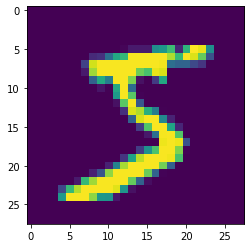

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam")

In [20]:
model.fit(X_train,y_train, epochs=10 ,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2827 - val_loss: 0.1564
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1248 - val_loss: 0.1225
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0868 - val_loss: 0.0990
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0649 - val_loss: 0.0918
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0496 - val_loss: 0.0948
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0386 - val_loss: 0.0999
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - val_loss: 0.0960
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0247 - val_loss: 0.0900
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0204 - val_loss: 0.0970
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.016

In [24]:
y_prob=model.predict(X_test)

In [25]:
y_pred=y_prob.argmax(axis=1)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9764